In [2]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [3]:
main_dir = "F:/projects/hirdl/Kidney Cancer"
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")
val_dir = os.path.join(main_dir, "valid")
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

In [4]:
for dir_path, dir_names, file_names in os.walk(main_dir):
    print(f"There are {len(dir_path)} directories and {len(file_names)} images in '{dir_path}'.")

There are 31 directories and 0 images in 'F:/projects/hirdl/Kidney Cancer'.
There are 36 directories and 0 images in 'F:/projects/hirdl/Kidney Cancer\test'.
There are 50 directories and 1000 images in 'F:/projects/hirdl/Kidney Cancer\test\kidney_normal'.
There are 49 directories and 1000 images in 'F:/projects/hirdl/Kidney Cancer\test\kidney_tumor'.
There are 37 directories and 0 images in 'F:/projects/hirdl/Kidney Cancer\train'.
There are 51 directories and 4000 images in 'F:/projects/hirdl/Kidney Cancer\train\kidney_normal'.
There are 50 directories and 4000 images in 'F:/projects/hirdl/Kidney Cancer\train\kidney_tumor'.


In [5]:
# #show random image from training set
# import random
# train_kidney_dir = os.path.join(train_dir, "Cyst")
# train_norm_kidney_dir = os.path.join(train_dir, "Normal")
# train_stone_kidney_dir = os.path.join(train_dir, "Stone")
# train_stone_tumor_kidney_dir = os.path.join(train_dir, "Tumor")
# random_kidney_img = random.choice(os.listdir(train_kidney_dir))
# img = mpimg.imread(os.path.join(train_kidney_dir, random_kidney_img))
# plt.imshow(img)
# plt.title("Random Kidney Image from Training Set")
# plt.axis(False)
# plt.show()


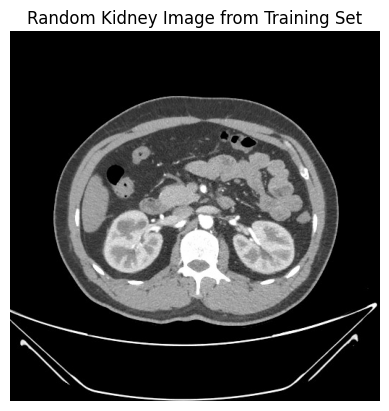

In [9]:
#show a random image from training set
import random
train_kidney_dir = os.path.join(train_dir, "kidney_normal")
train_kidney_tumor_dir = os.path.join(train_dir, "kidney_tumor")
random_kidney_img = random.choice(os.listdir(train_kidney_dir))
img = mpimg.imread(os.path.join(train_kidney_dir, random_kidney_img))
plt.imshow(img)
plt.title("Random Kidney Image from Training Set")
plt.axis(False)
plt.show()

In [10]:
import pathlib
import numpy as np
import pandas as pd
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# class_names = pd.DataFrame(class_names, columns=["Class Names"])
print(class_names)

['kidney_normal' 'kidney_tumor']


In [29]:
# random image function with shape

def view_rendom_image_with_shape(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(f"This image is from class {target_class}")
    plt.axis('off')
    plt.show()
    print(f"Image shape: {img.shape}")
    return img


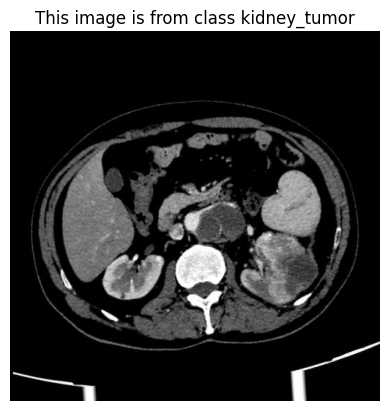

Image shape: (512, 512, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(512, 512, 3), dtype=uint8)

In [32]:
view_rendom_image_with_shape(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [14]:
#show 9 random images function
def view_9_images(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    plt.figure(figsize=(10,10))
    for i in range(9):
        random_image = random.sample(os.listdir(target_folder), 1)
        img = mpimg.imread(os.path.join(target_folder, random_image[0]))
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(f"Class: {target_class}")
        plt.axis('off')
    plt.show()

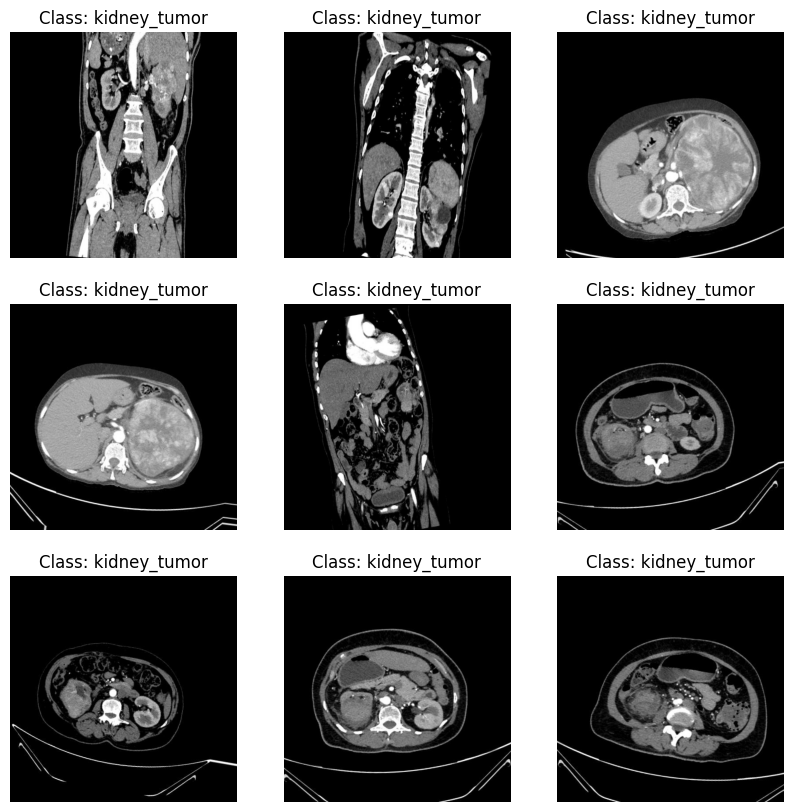

In [19]:
import random
view_9_images(target_dir=train_dir,
               target_class=random.choice(class_names))

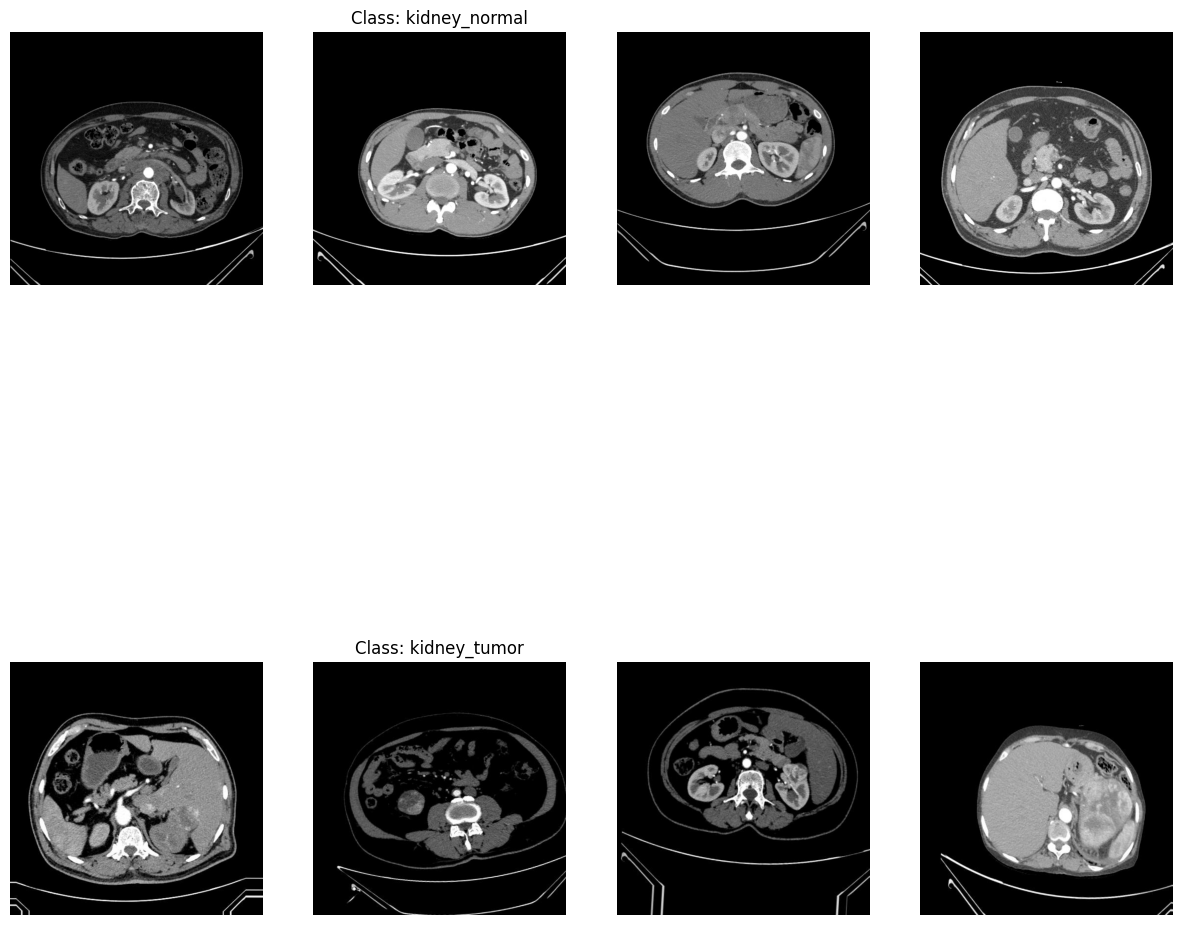

In [20]:
# show 4 random images from each class
def view_4_images_per_class(target_dir, class_names):
    plt.figure(figsize=(15,15))
    for class_index, target_class in enumerate(class_names):
        target_folder = os.path.join(target_dir, target_class)
        for i in range(4):
            random_image = random.sample(os.listdir(target_folder), 1)
            img = mpimg.imread(os.path.join(target_folder, random_image[0]))
            plt.subplot(len(class_names), 4, class_index * 4 + i + 1)
            plt.imshow(img)
            if i == 1:
                plt.title(f"Class: {target_class}")
            plt.axis('off')
    plt.show()
view_4_images_per_class(target_dir=train_dir, class_names=class_names)


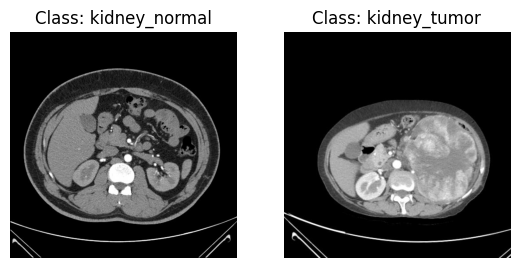

In [22]:
#show n random images from different classes
def view_n_images_different_classes(target_dir, class_names):
    plt.figure(figsize=(10,10))
    num_classes = min(9, len(class_names))
    selected_classes = random.sample(list(class_names), num_classes)
    for i, target_class in enumerate(selected_classes):
        target_folder = os.path.join(target_dir, target_class)
        images = os.listdir(target_folder)
        num_images = min(1, len(images))
        random_image = random.sample(images, num_images)
        img = mpimg.imread(os.path.join(target_folder, random_image[0]))
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(f"Class: {target_class}")
        plt.axis('off')
    plt.show()
view_n_images_different_classes(target_dir=train_dir, class_names=class_names)

In [25]:
# import cv2
# import numpy as np

# def segment_grayscale_image_thresholding(image_path, threshold_value=128):
#     """
#     Segments a grayscale image using simple thresholding.

#     Args:
#         image_path (str): Path to the input image.
#         threshold_value (int): The threshold value to apply (0-255).
#                                Pixels above this value are set to white (255),
#                                and pixels below are set to black (0).

#     Returns:
#         numpy.ndarray: The segmented binary image.
#     """
#     # Load the image
#     image = cv2.imread(image_path)

#     if image is None:
#         print(f"Error: Could not load image from {image_path}")
#         return None

#     # Convert to grayscale if it's a color image
#     if len(image.shape) == 3:
#         gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     else:
#         gray_image = image  # Already grayscale

#     # Apply binary thresholding
#     ret, segmented_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

#     return segmented_image

# # Select a random class and image filename, build a proper file path (string)
# target_class = random.choice(class_names)
# target_folder = os.path.join(train_dir, target_class)
# random_image_name = random.choice(os.listdir(target_folder))
# image_path = os.path.join(target_folder, random_image_name)

# # Display the original image (use the image path we just built)
# img = mpimg.imread(image_path)
# plt.imshow(img)
# plt.title(f"Original image: {target_class}/{random_image_name}")
# plt.axis('off')
# plt.show()

# # Segment using the file path (string) so cv2.imread receives a valid filename
# segmented_image = segment_grayscale_image_thresholding(image_path=image_path, threshold_value=200)
# if segmented_image is not None:
#     plt.imshow(segmented_image, cmap='gray')
#     plt.title("Segmented Image using Thresholding")
#     plt.axis('off')
#     plt.show()

In [26]:
# # ...existing code...
# def segment_grayscale_image_thresholding(image_input, threshold_value):
#     import os
#     import numpy as np
#     from PIL import Image
#     import cv2

#     # Accept path-like, numpy array, or PIL Image
#     if isinstance(image_input, (str, os.PathLike)):
#         image = cv2.imread(str(image_input), cv2.IMREAD_UNCHANGED)
#         if image is None:
#             raise FileNotFoundError(f"Could not load image from path: {image_input}")
#     elif isinstance(image_input, np.ndarray):
#         image = image_input.copy()
#     elif isinstance(image_input, Image.Image):
#         image = cv2.cvtColor(np.array(image_input), cv2.COLOR_RGB2BGR)
#     else:
#         raise TypeError("image_input must be a path, numpy.ndarray, or PIL.Image.Image")

#     # Convert to grayscale if needed
#     if image.ndim == 3:
#         gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     else:
#         gray_image = image

#     # Ensure dtype is uint8
#     if gray_image.dtype != np.uint8:
#         gray_image = (255 * (gray_image.astype('float32') / gray_image.max())).astype('uint8')

#     _, segmented_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
#     return segmented_image

In [27]:
# image_path = view_rendom_image(target_dir=train_dir, target_class=random.choice(class_names))
# segmented = segment_grayscale_image_thresholding(image_path, 240)
# plt.title("Segmented Image")
# plt.imshow(segmented, cmap='gray')
# plt.axis('off')
# plt.show()

In [46]:
# random image function without shape

def view_rendom_image_no_shape(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(f"This image is from class {target_class}")
    plt.axis('off')
    plt.show()
    return img

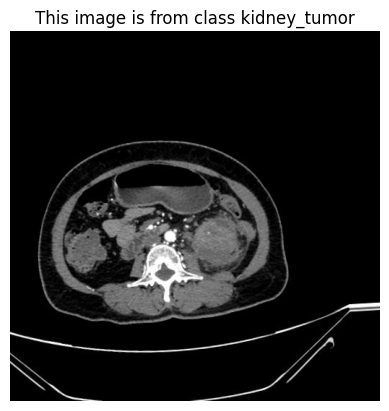

In [63]:
image = view_rendom_image_no_shape(target_dir=train_dir,
                        target_class="kidney_tumor")

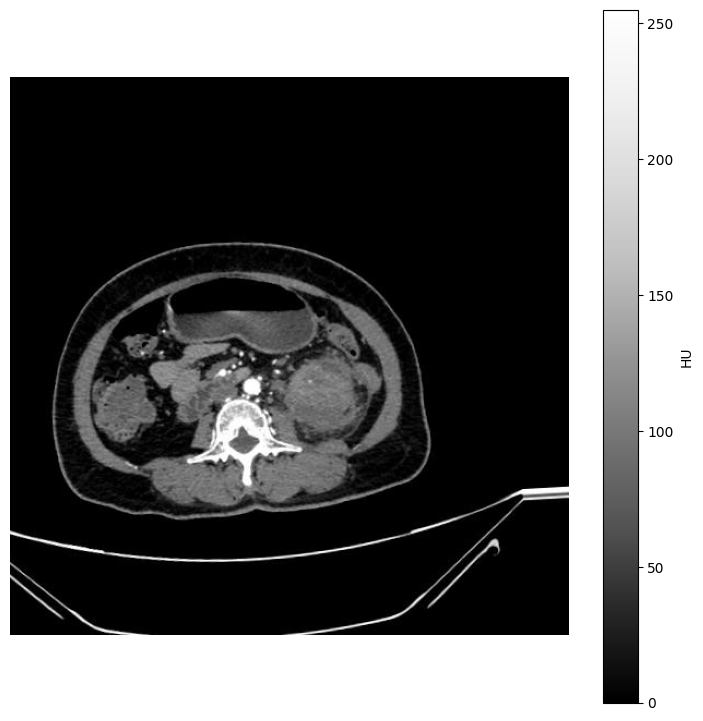

In [67]:
plt.figure(figsize=(9,9))
plt.imshow(image, cmap='Greys_r')
plt.colorbar(label='HU')
plt.axis('off')
plt.show()